
# Student Result Analysis Project
#### By AD Team-150
### This project is about how the student's performance is affected by other variables such as gender, race/ethinicity, parental level of education, lunch and test preparation course.

## Importing Required Packages 

In [1]:
# Basic Import
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [23]:
df = pd.read_csv("/Users/sahithipadamati/Downloads/archive (1) 2/Original_data_with_more_rows.csv")
print("Data Shape is :",df.shape)
print("\nShow Top 10 Records")
df.head(10)

Data Shape is : (30641, 9)

Show Top 10 Records


,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,MathScore,ReadingScore,WritingScore
0,0,female,group B,bachelor's degree,standard,none,72,72,74
1,1,female,group C,some college,standard,completed,69,90,88
2,2,female,group B,master's degree,standard,none,90,95,93
3,3,male,group A,associate's degree,free/reduced,none,47,57,44
4,4,male,group C,some college,standard,none,76,78,75
5,5,female,group B,associate's degree,standard,none,71,83,78
6,6,female,group B,some college,standard,completed,88,95,92
7,7,male,group B,some college,free/reduced,none,40,43,39
8,8,male,group D,high school,free/reduced,completed,64,64,67
9,9,female,group B,high school,free/reduced,none,38,60,50


### Checking Missing Values

In [9]:
df.isna().sum()

Unnamed: 0      0
Gender          0
EthnicGroup     0
ParentEduc      0
LunchType       0
TestPrep        0
MathScore       0
ReadingScore    0
WritingScore    0
dtype: int64

**Result:** There are no missing values in the data set.

### Checking Duplicates

In [24]:
df.duplicated().sum()

0

**Result:** There are no duplicates values in the data set

### Checking Data Types

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    30641 non-null  int64 
 1   Gender        30641 non-null  object
 2   EthnicGroup   30641 non-null  object
 3   ParentEduc    30641 non-null  object
 4   LunchType     30641 non-null  object
 5   TestPrep      30641 non-null  object
 6   MathScore     30641 non-null  int64 
 7   ReadingScore  30641 non-null  int64 
 8   WritingScore  30641 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 2.1+ MB


### Checking the number of unique values of each column

In [14]:
df.nunique()

Unnamed: 0      1000
Gender             2
EthnicGroup        5
ParentEduc         6
LunchType          2
TestPrep           2
MathScore         94
ReadingScore      88
WritingScore      92
dtype: int64

### Print numerical and categorical columns

In [15]:
# Define numerical & categorical columns
numeric_columns = [column for column in df.columns if df[column].dtype != 'O']
categorical_columns = [column for column in df.columns if df[column].dtype == 'O']
print('We have {} numerical columns(features) : {}'.format(len(numeric_columns), numeric_columns))
print('\nWe have {} categorical columns(features) : {}'.format(len(categorical_columns), categorical_columns))

We have 4 numerical columns(features) : ['Unnamed: 0', 'MathScore', 'ReadingScore', 'WritingScore']

We have 5 categorical columns(features) : ['Gender', 'EthnicGroup', 'ParentEduc', 'LunchType', 'TestPrep']


### Print the number of unique values of each categorical column

In [16]:
for feature in df.columns :
    if df[feature].dtype == 'O':
        print('Categories in {} variable : {}'.format(feature,df[feature].unique()))

Categories in Gender variable : ['female' 'male']
Categories in EthnicGroup variable : ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in ParentEduc variable : ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in LunchType variable : ['standard' 'free/reduced']
Categories in TestPrep variable : ['none' 'completed']


### Checking statistics of data set

In [17]:
df.describe()

,Unnamed: 0,MathScore,ReadingScore,WritingScore
count,30641.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,66.749355,69.624980,68.468327
std,288.747894,15.206049,14.671572,15.307814
min,0.000000,0.000000,10.000000,5.000000
25%,249.000000,56.000000,60.000000,58.000000
50%,500.000000,67.000000,70.000000,69.000000
75%,750.000000,78.000000,80.000000,79.000000
max,999.000000,100.000000,100.000000,100.000000


**Insight**
* From above description all means are very close to each other: Between 66 and 69.16
* All standard deviations are also close to each other: Between 14.60 and 15.19
* Minimum score for math is 0, Minimum score for reading is 17, Minimum score for writing is 10

### Adding 'Total' and 'Average' Columns

In [26]:
df['total score']= df['MathScore'] + df['ReadingScore'] + df['WritingScore']
df['avg score'] = df['total score']/3
df.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,MathScore,ReadingScore,WritingScore,total score,avg score
0,0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,4,male,group C,some college,standard,none,76,78,75,229,76.333333


### Counting the total number of students who obtained full marks and those who scored less than 25 marks in Mathematics, Reading, and Writing.

In [27]:
math_full_score = df[df['MathScore']==100]['MathScore'].count()
reading_full_score = df[df['ReadingScore']==100]['ReadingScore'].count()
writing_full_score =  df[df['WritingScore']==100]['WritingScore'].count()
print(f'Number of students with full marks in Maths: {math_full_score }')
print(f'Number of students with full marks in Reading: {reading_full_score}')
print(f'Number of students with full marks in Writing: {writing_full_score}')

Number of students with full marks in Maths: 294
Number of students with full marks in Reading: 420
Number of students with full marks in Writing: 475


In [77]:
math_less_25 = df[df['MathScore'] <= 25]['MathScore'].count()
reading_less_25 = df[df['ReadingScore'] <= 25]['ReadingScore'].count()
writing_less_25 = df[df['WritingScore'] <= 25]['WritingScore'].count()

print(f'Number of students with less than 25 marks in Maths: {math_less_25}')
print(f'Number of students with less than 25 marks in Reading: {reading_less_25}')
print(f'Number of students with less than 25 marks in Writing: {writing_less_25}')

Number of students with less than 25 marks in Maths: 120
Number of students with less than 25 marks in Reading: 68
Number of students with less than 25 marks in Writing: 93


**Result**
* From above values we get students have performed the worst in Maths
* Best performance is in writing section

## Visualizing the Data

### Gender wise Average Score, Math Score, Reading Score, Writing Score distribution

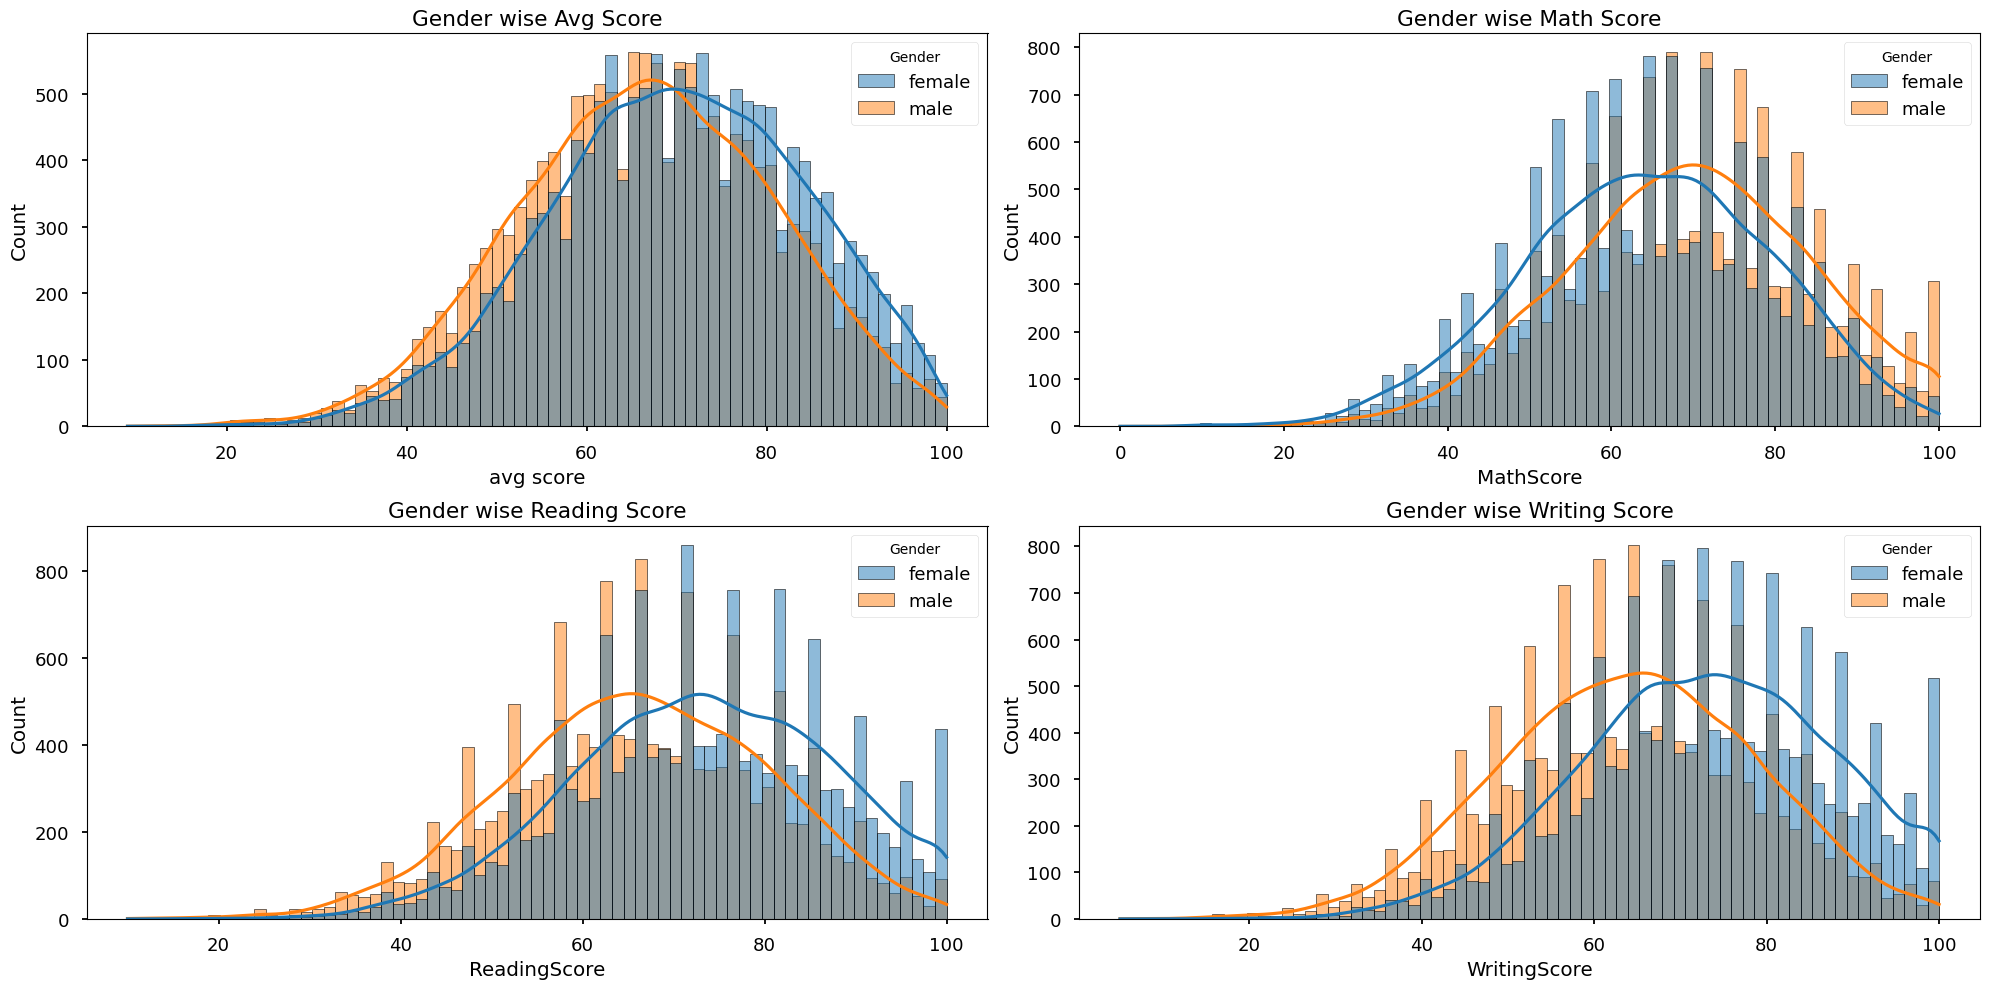

In [38]:
fig, axs = plt.subplots(2, 2, figsize=(20, 10))
sns.histplot(data=df,x='avg score',kde=True,hue='Gender',ax=axs[0, 0])
axs[0, 0].set_title('Gender wise Avg Score')
sns.histplot(data=df,x='MathScore',kde=True,hue='Gender',ax=axs[0, 1])
axs[0, 1].set_title('Gender wise Math Score')
sns.histplot(data=df,x='ReadingScore',kde=True,hue='Gender',ax=axs[1, 0])
axs[1, 0].set_title('Gender wise Reading Score')
sns.histplot(data=df,x='WritingScore',kde=True,hue='Gender',ax=axs[1, 1])
axs[1, 1].set_title('Gender wise Writing Score')
plt.tight_layout()
plt.show()

**Insights**
* Female students tend to perform well then male students

### Lunch Group wise Score Distribution

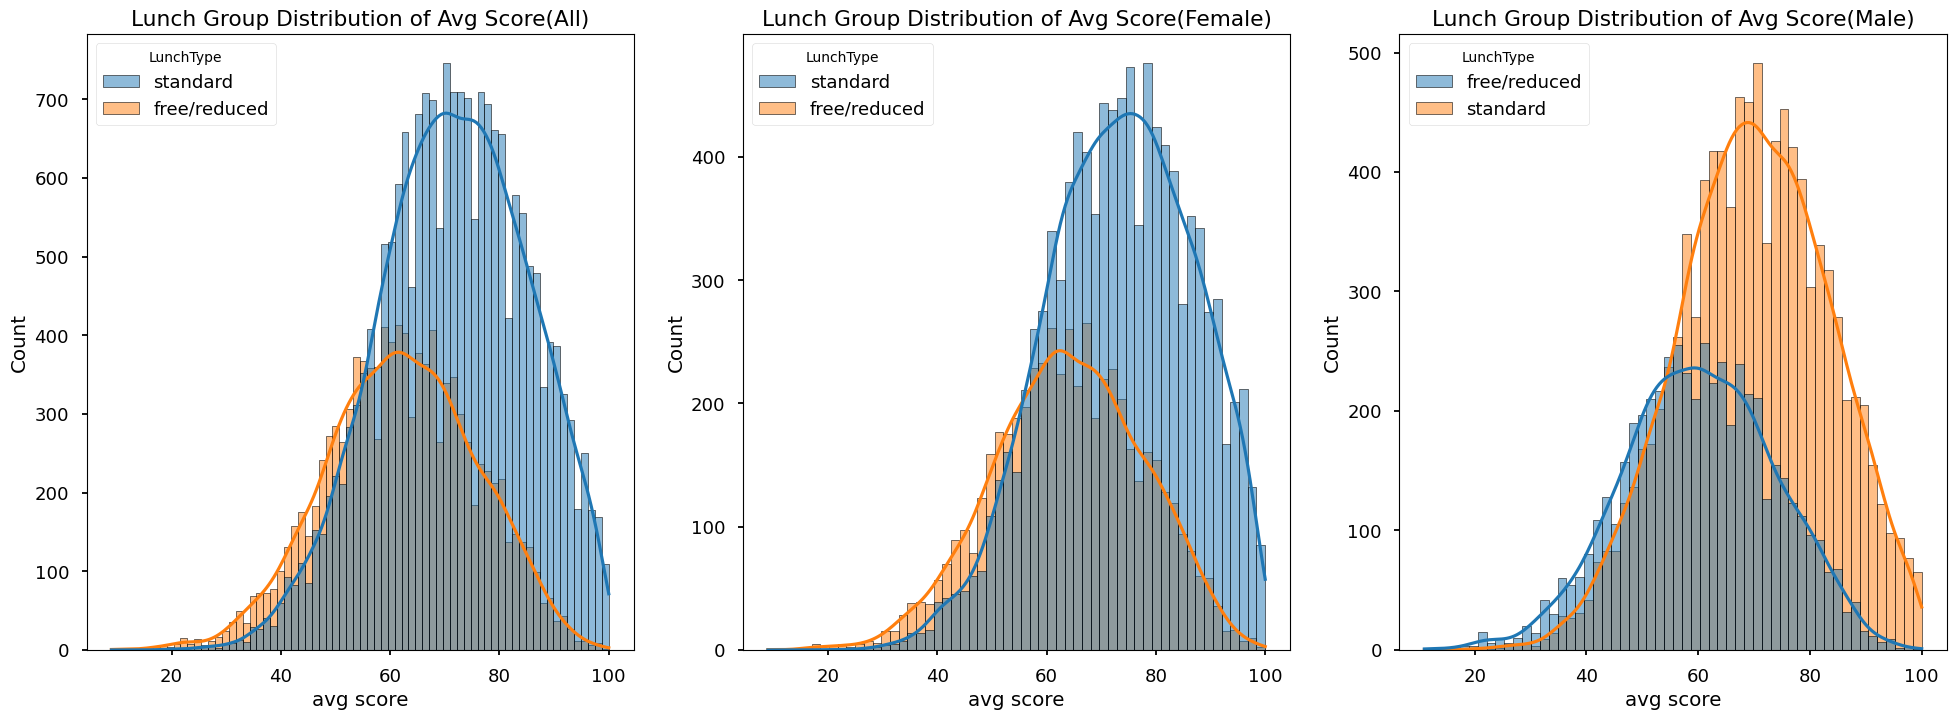

In [29]:
fig, axs = plt.subplots(1, 3, figsize=(24,8))
axs[0].set_title('Lunch Group Distribution of Avg Score(All)')
sns.histplot(data=df, x='avg score', kde=True, hue='LunchType', ax=axs[0])
axs[1].set_title('Lunch Group Distribution of Avg Score(Female)')
sns.histplot(data=df[df.Gender=='female'], x='avg score', kde=True, hue='LunchType', ax=axs[1])
axs[2].set_title('Lunch Group Distribution of Avg Score(Male)')
sns.histplot(data=df[df.Gender=='male'], x='avg score', kde=True, hue='LunchType', ax=axs[2])
plt.show()

**Insights**
* Standard lunch helps perform well in exams.
* Standard lunch helps perform well in exams be it a male or a female.

### Parental level of education wise Score Distribution

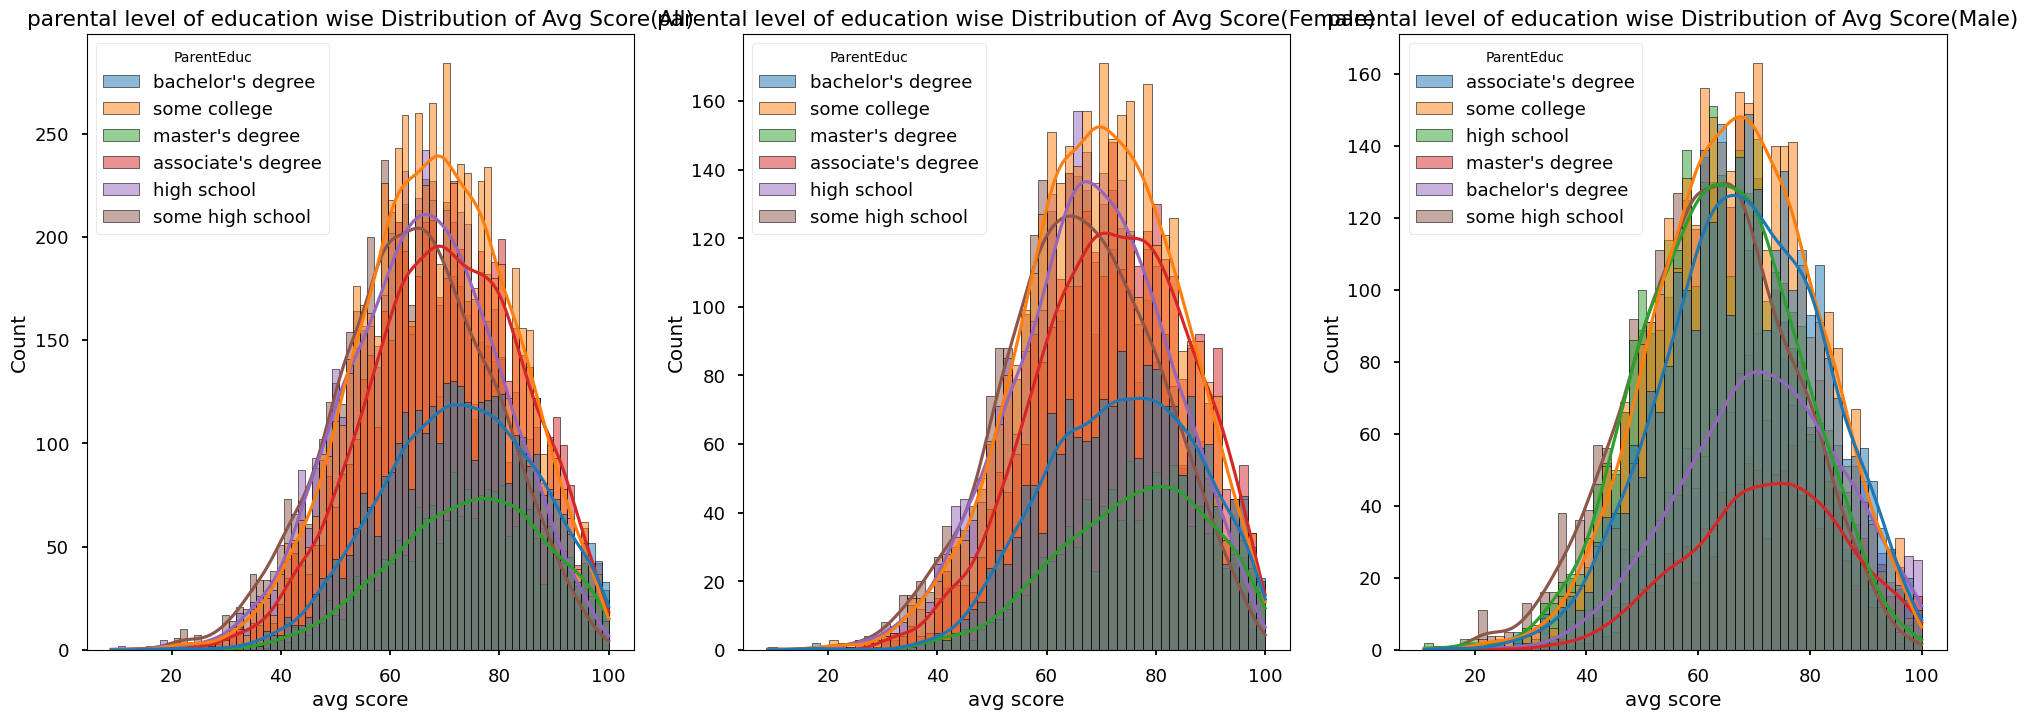

In [30]:
fig, axs = plt.subplots(1, 3, figsize=(24,8))
axs[0].set_title('parental level of education wise Distribution of Avg Score(All)')
sns.histplot(data=df, x='avg score', kde=True, hue='ParentEduc', ax=axs[0])
axs[1].set_title('parental level of education wise Distribution of Avg Score(Female)')
sns.histplot(data=df[df.Gender=='female'], x='avg score', kde=True, hue='ParentEduc', ax=axs[1])
axs[2].set_title('parental level of education wise Distribution of Avg Score(Male)')
sns.histplot(data=df[df.Gender=='male'], x='avg score', kde=True, hue='ParentEduc', ax=axs[2])
plt.show()

**Insights**
* In general parent's education don't help student perform well in exam.
* 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
* 3rd plot we can see there is no effect of parent's education on female students.

### Race/Ethnicity wise Score Distribution

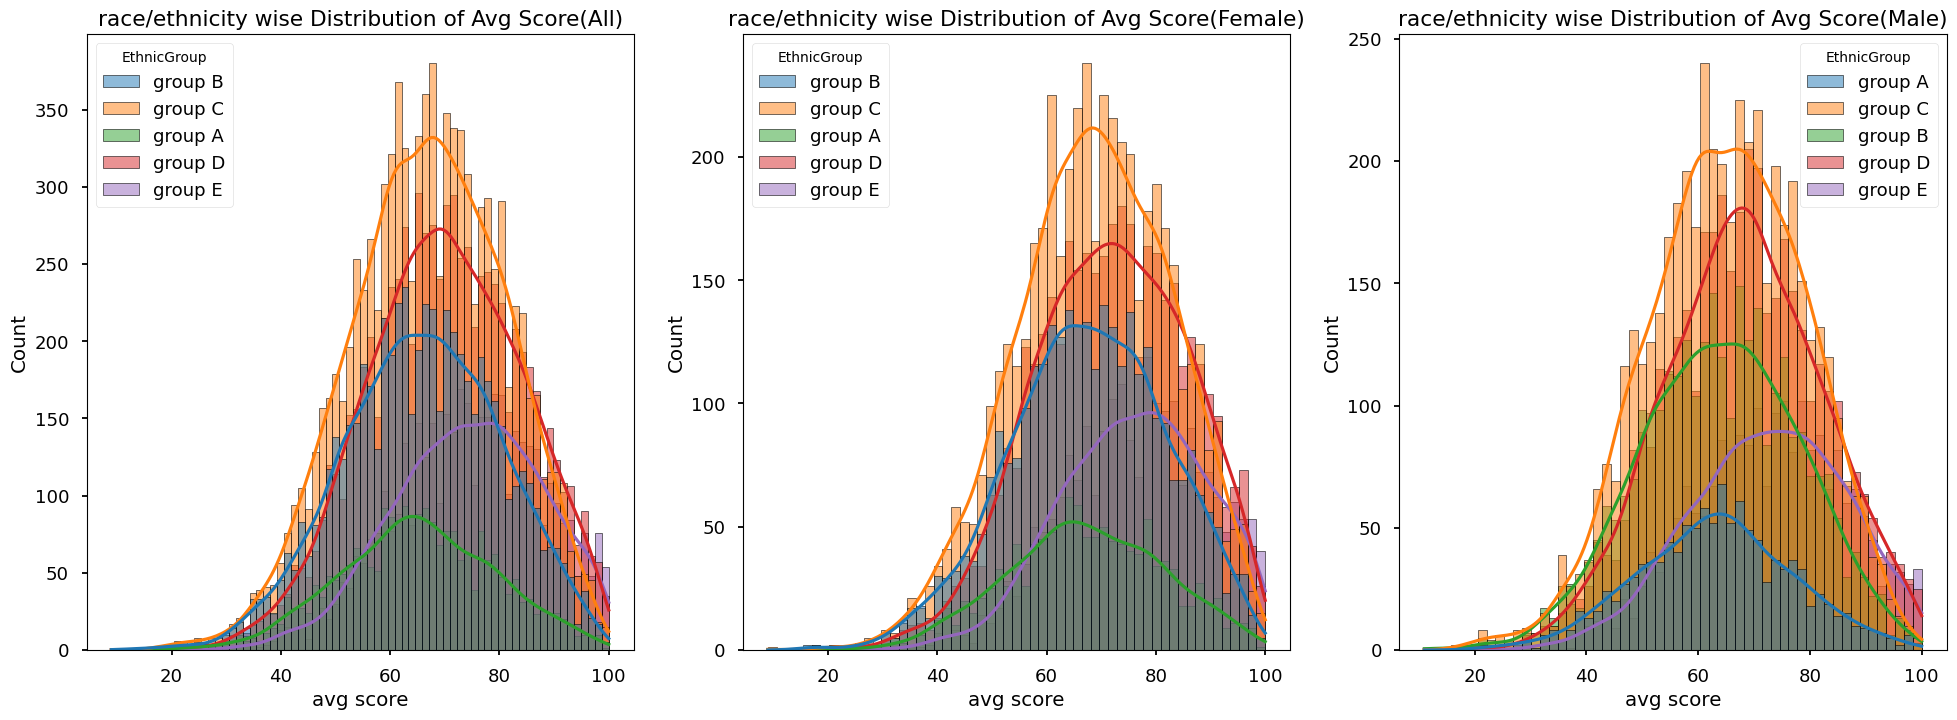

In [31]:
fig, axs = plt.subplots(1, 3, figsize=(24,8))
axs[0].set_title('race/ethnicity wise Distribution of Avg Score(All)')
sns.histplot(data=df, x='avg score', kde=True, hue='EthnicGroup', ax=axs[0])
axs[1].set_title('race/ethnicity wise Distribution of Avg Score(Female)')
sns.histplot(data=df[df.Gender=='female'], x='avg score', kde=True, hue='EthnicGroup', ax=axs[1])
axs[2].set_title('race/ethnicity wise Distribution of Avg Score(Male)')
sns.histplot(data=df[df.Gender=='male'], x='avg score', kde=True, hue='EthnicGroup', ax=axs[2])
plt.show()

**Insights**
* Students of group A and group B tends to perform poorly in exam.
* Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

### Score of students in all three subjects

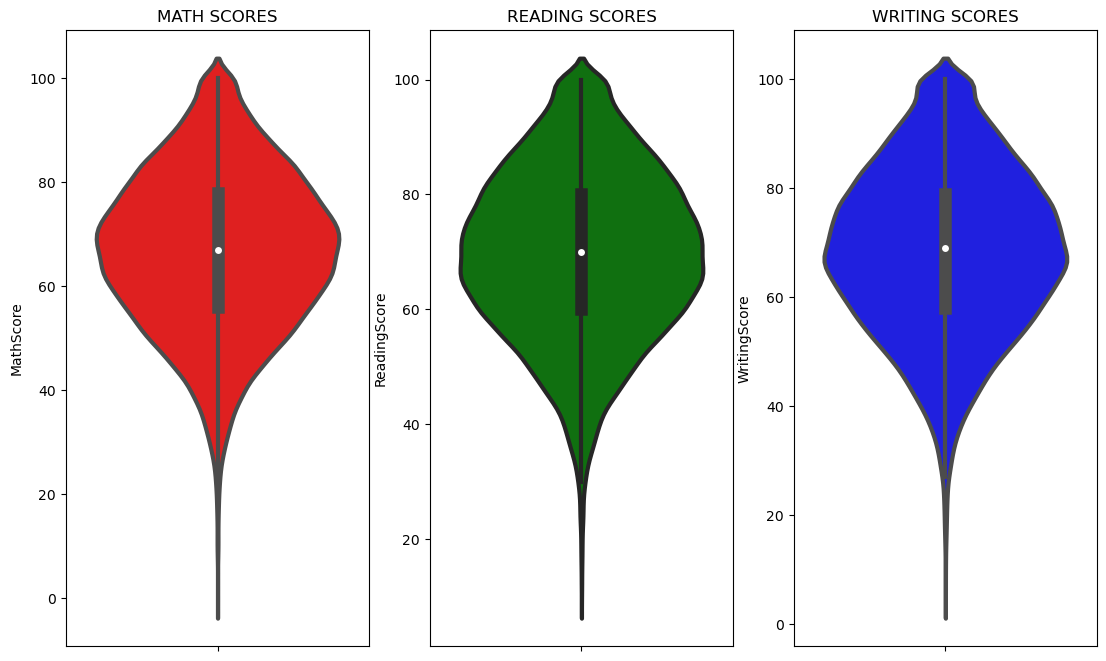

In [25]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='MathScore',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='ReadingScore',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='WritingScore',data=df,color='blue',linewidth=3)
plt.show()

**Insights**
* From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

### Multivariate analysis using pieplot

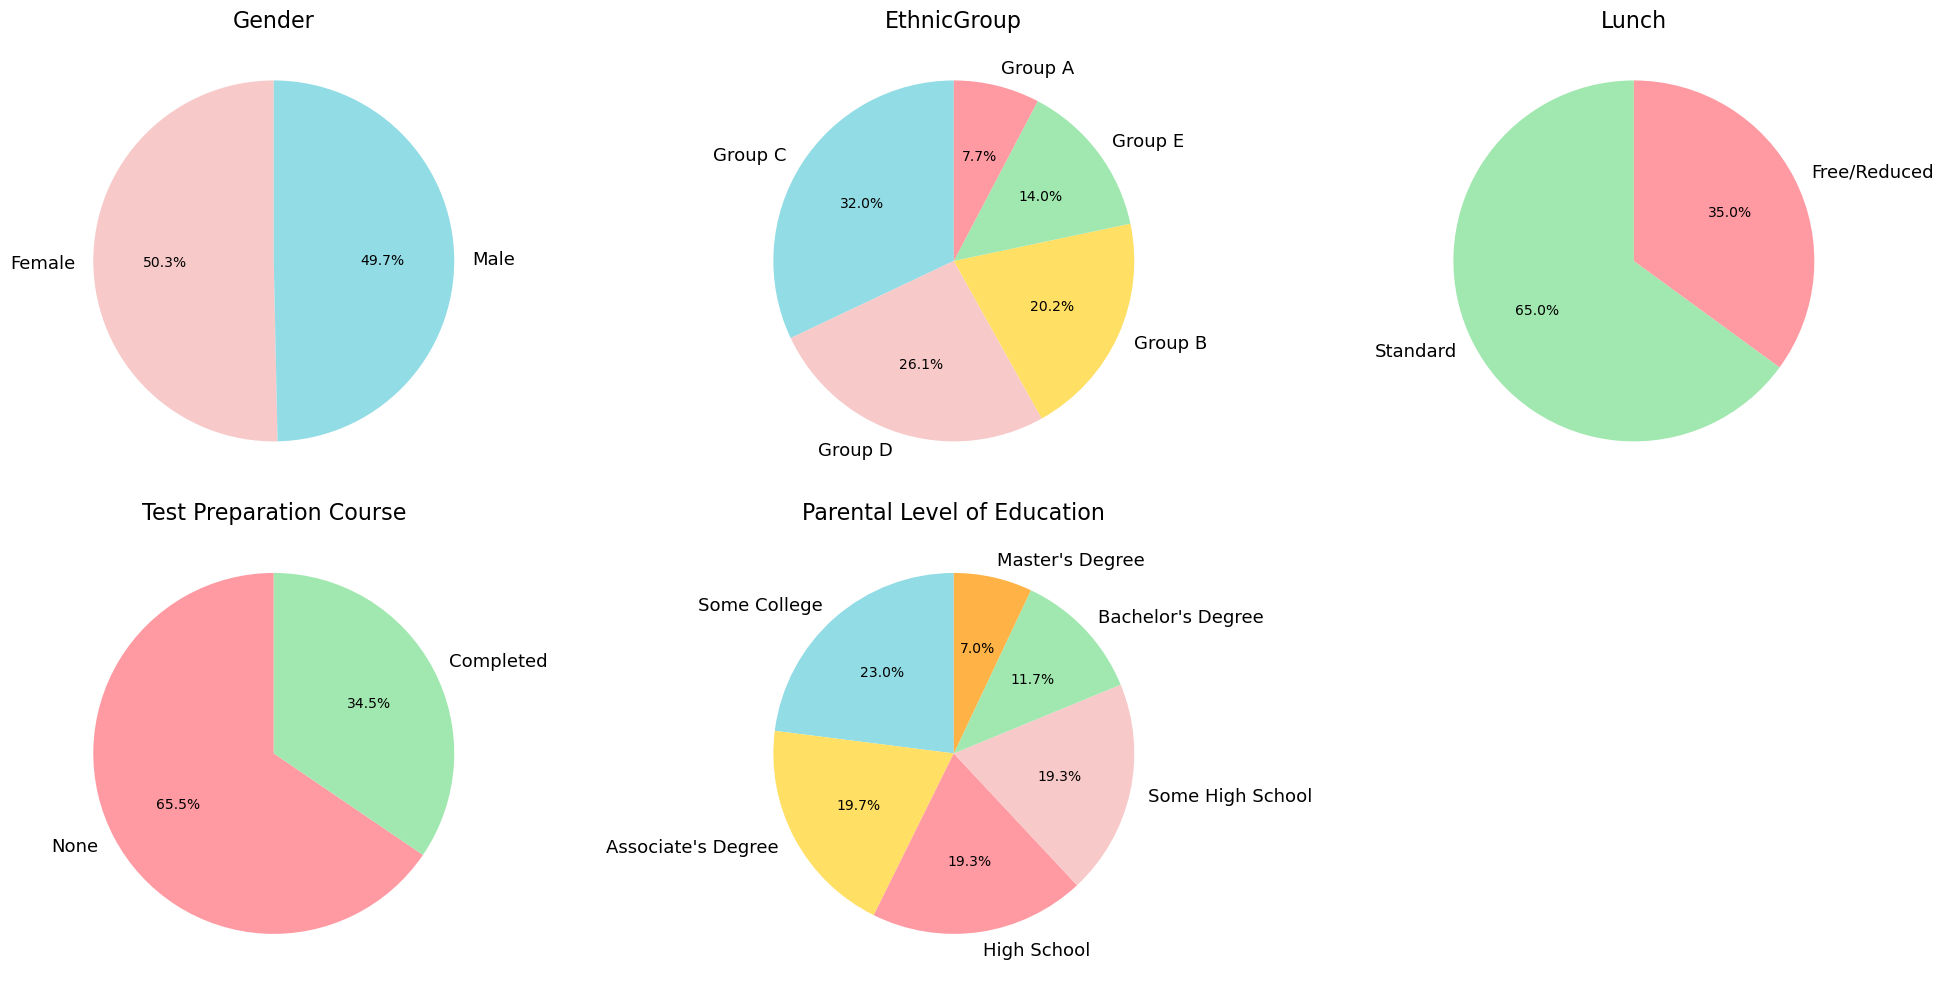

In [32]:
plt.figure(figsize=(20, 10))
# Gender
plt.subplot(2, 3, 1)
size = df['Gender'].value_counts()
labels = ['Female', 'Male']
colors = ['#F7CAC9', '#92DCE5']
plt.pie(size, colors=colors, labels=labels, autopct='%.1f%%', startangle=90)
plt.title('Gender',fontsize=16)
# Race/Ethnicity
plt.subplot(2, 3, 2)
size = df['EthnicGroup'].value_counts()
labels = ['Group C', 'Group D', 'Group B', 'Group E', 'Group A']
colors = ['#92DCE5', '#F7CAC9', '#FFDF64', '#A0E8AF', '#FF9AA2']
plt.pie(size, colors=colors, labels=labels, autopct='%.1f%%', startangle=90)
plt.title('EthnicGroup',fontsize=16)
# Lunch
plt.subplot(2, 3, 3)
size = df['LunchType'].value_counts()
labels = ['Standard', 'Free/Reduced']
colors = ['#A0E8AF', '#FF9AA2']
plt.pie(size, colors=colors, labels=labels, autopct='%.1f%%', startangle=90)
plt.title('Lunch',fontsize=16)
# Test Preparation Course
plt.subplot(2, 3, 4)
size = df['TestPrep'].value_counts()
labels = ['None', 'Completed']
colors = ['#FF9AA2', '#A0E8AF']
plt.pie(size, colors=colors, labels=labels, autopct='%.1f%%', startangle=90)
plt.title('Test Preparation Course',fontsize=16)
# Parental Level of Education
plt.subplot(2, 3, 5)
size = df['ParentEduc'].value_counts()
labels = ["Some College", "Associate's Degree", "High School", "Some High School", "Bachelor's Degree", "Master's Degree"]
colors = ['#92DCE5', '#FFDF64', '#FF9AA2', '#F7CAC9', '#A0E8AF', '#FFB347']
plt.pie(size, colors=colors, labels=labels, autopct='%.1f%%', startangle=90)
plt.title('Parental Level of Education',fontsize=16)
plt.tight_layout()
plt.show()

**Insights**
* Gender wise Number of Male and Female students is almost equal
* Race/Ethnicity wise Number students are greatest in Group C
* Lunch wise Number of students who have standard lunch are greater
* Test Preparation Course wise Number of students who have not enrolled in any test preparation course is greater
* Parental Level of Education wise Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

### Feature wise Visualization

#### How is distribution of Gender? **(Univariate Analysis)**

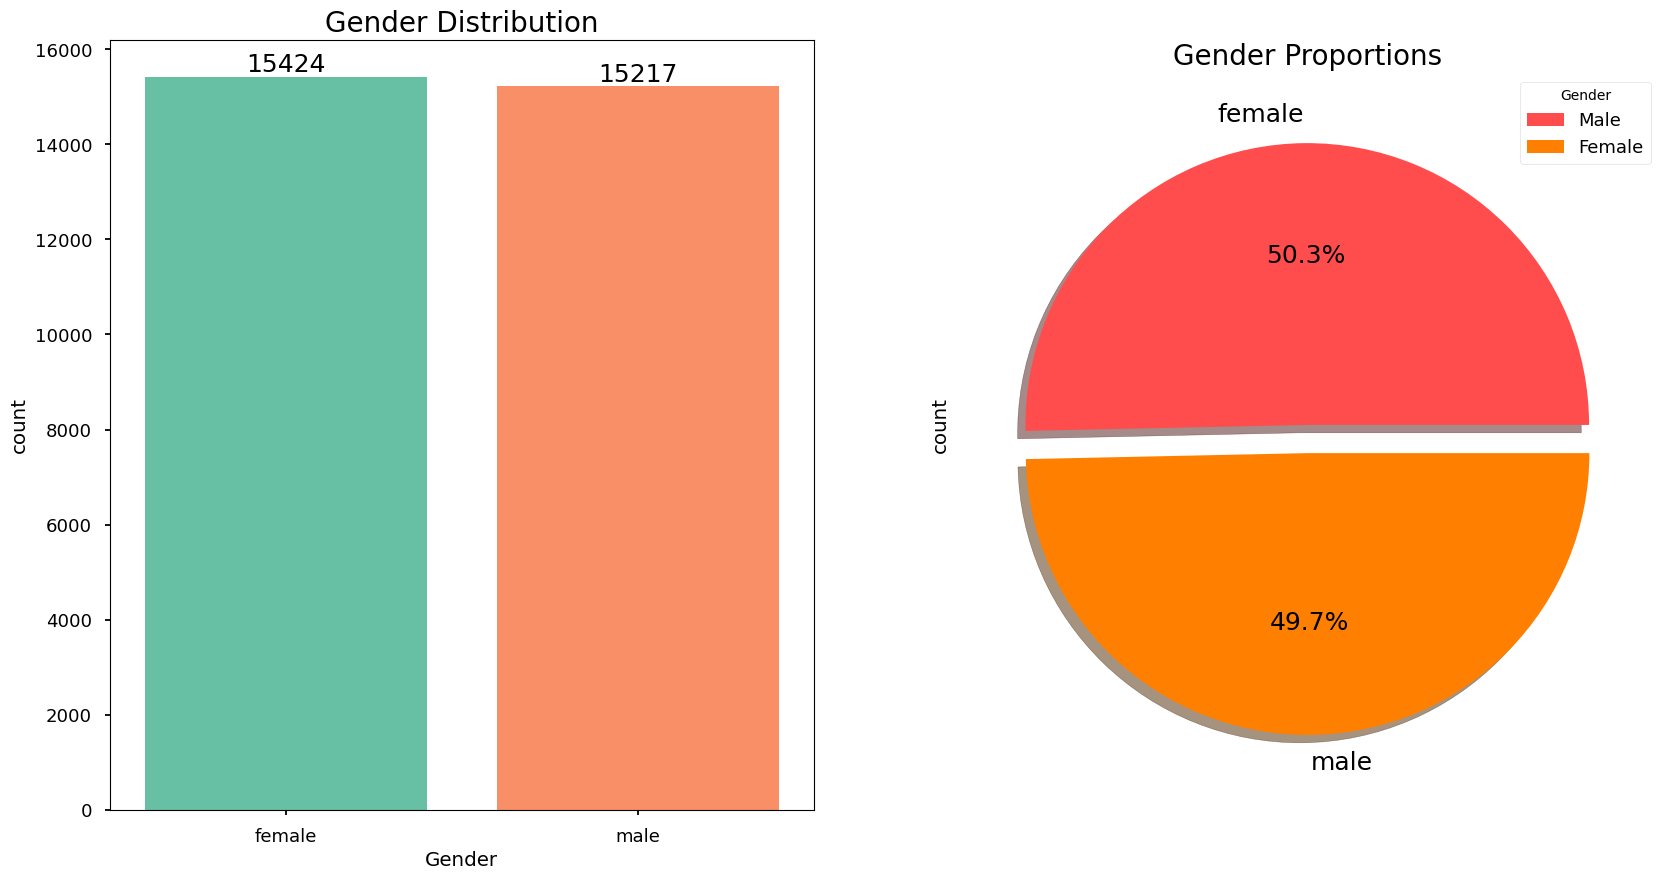

In [33]:
colors = sns.color_palette('Set2')
# create the subplots
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
# plot the count plot
sns.countplot(x=df['Gender'], data=df, palette=colors, ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', fontsize=18)
# plot the pie chart
pie_colors = ['#ff4d4d', '#ff8000']
df['Gender'].value_counts().plot(kind='pie', colors=pie_colors, explode=[0, 0.1],
                                 autopct='%1.1f%%', shadow=True, ax=ax[1], textprops={'fontsize': 18})
ax[0].set_title('Gender Distribution', fontsize=20)
ax[1].set_title('Gender Proportions', fontsize=20)
ax[1].legend(title='Gender', loc='best', labels=['Male', 'Female'])
plt.show()

**Insights**
* Gender has balanced data with female students are 51424 (50.3%) and male students are 15217 (49.7%)

### Race/Ethnicity Column
* How is Group wise distribution ?
* Is race/ethnicity has any impact on student's performance?

#### How is Group wise distribution? **(Univariate Analysis)**

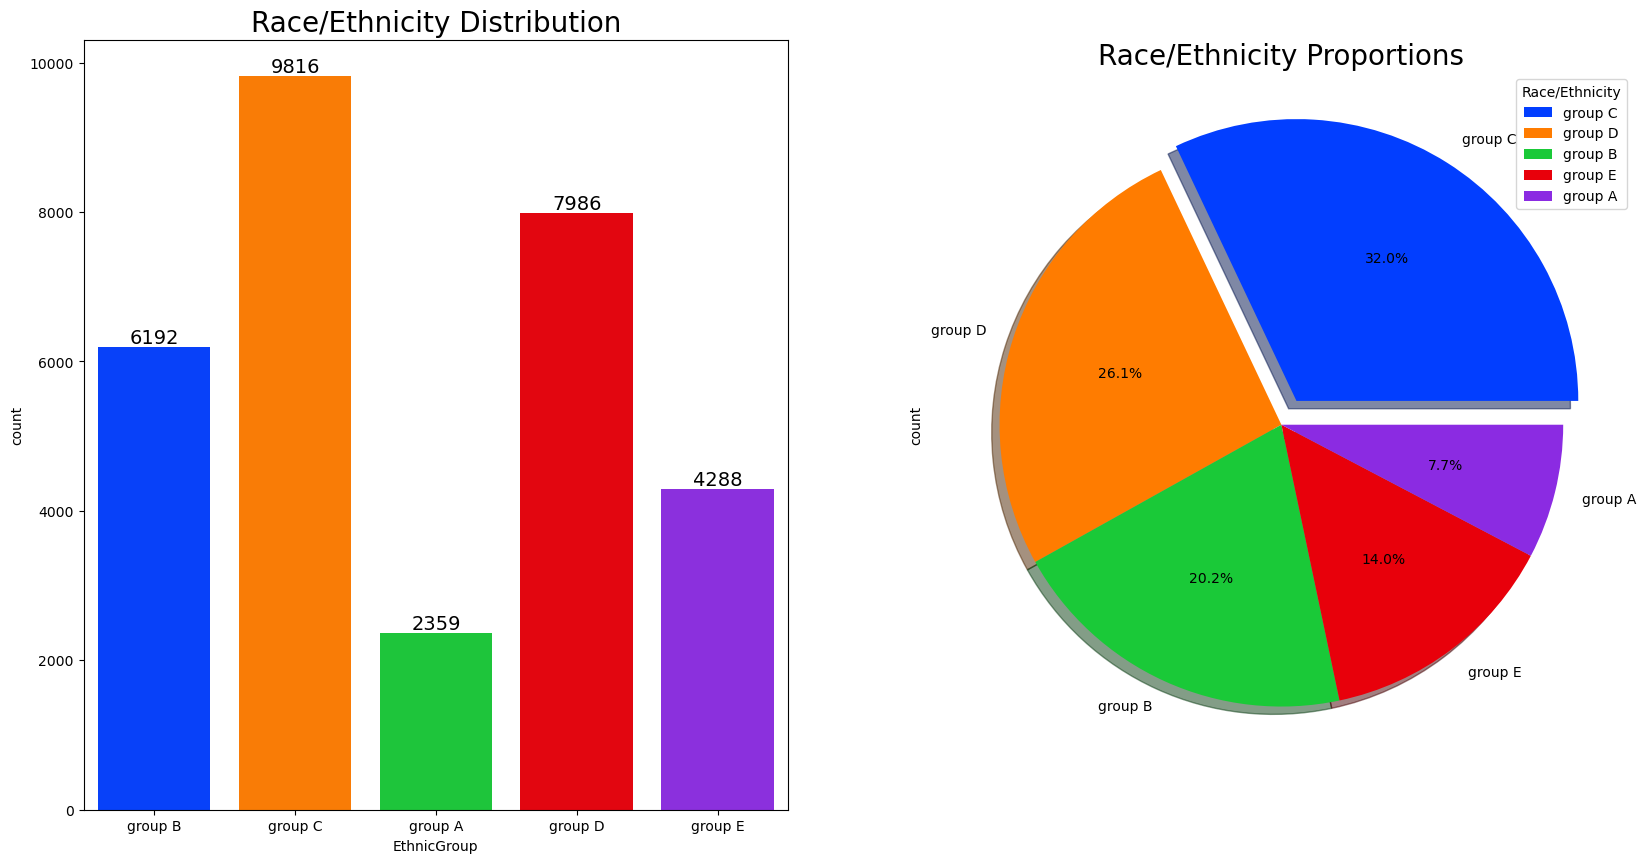

In [39]:
colors = sns.color_palette('bright')
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
# plot the count plot
sns.countplot(x=df['EthnicGroup'], data=df, palette=colors, ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', fontsize=14)
# plot the pie chart
explode = [0.1, 0, 0, 0, 0]
df['EthnicGroup'].value_counts().plot(kind='pie', colors=colors, explode=explode,
                                         autopct='%1.1f%%', shadow=True, ax=ax[1])
ax[0].set_title('Race/Ethnicity Distribution', fontsize=20)
ax[1].set_title('Race/Ethnicity Proportions', fontsize=20)
ax[1].legend(title='Race/Ethnicity', loc='best', labels=df['EthnicGroup'].value_counts().index)
plt.show()

**Insights**
* Most of the student belonging from group C /group D.
* Lowest number of students belong to groupA.

#### Is race/ethnicity has any impact on student's performance? **(Bivariate Analysis)**

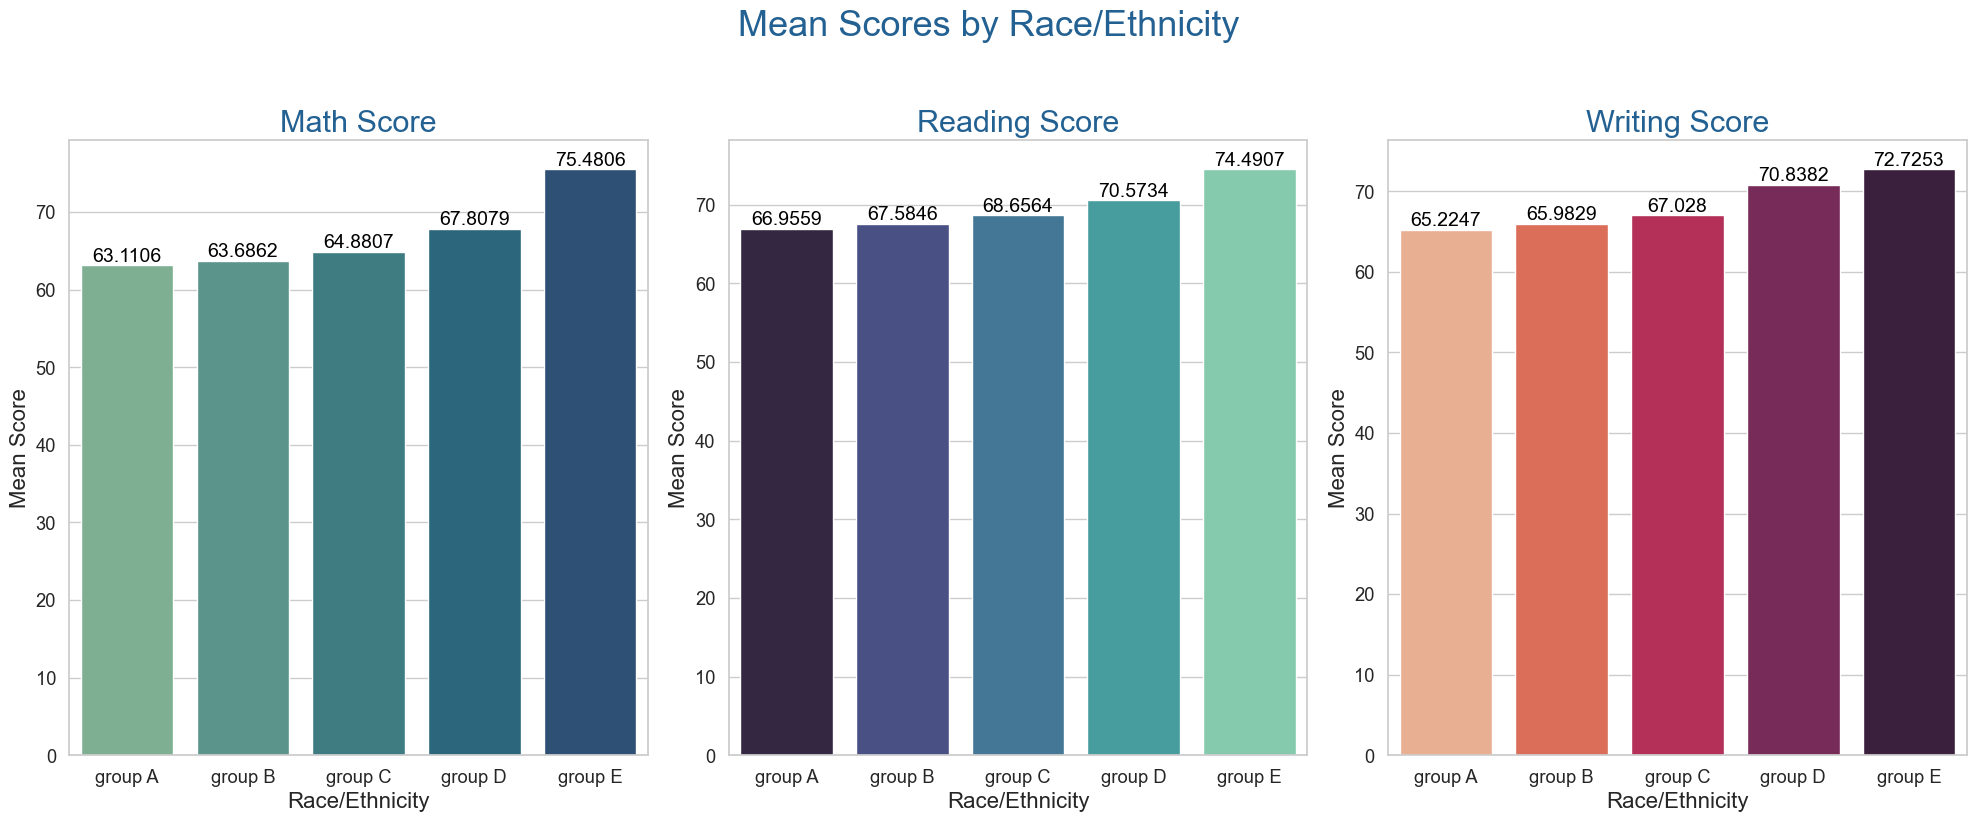

In [83]:
Group_data2 = df.groupby('EthnicGroup')
# create the subplots
fig, ax = plt.subplots(1, 3, figsize=(20, 8))
# plot the math scores
sns.barplot(x=Group_data2['MathScore'].mean().index, y=Group_data2['MathScore'].mean().values, palette='crest', ax=ax[0])
ax[0].set_title('Math Score', color='#236192', size=22)
ax[0].set_xlabel('Race/Ethnicity', fontsize=16)
ax[0].set_ylabel('Mean Score', fontsize=16)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', fontsize=14)
sns.barplot(x=Group_data2['ReadingScore'].mean().index, y=Group_data2['ReadingScore'].mean().values, palette='mako', ax=ax[1])
ax[1].set_title('Reading Score', color='#236192', size=22)
ax[1].set_xlabel('Race/Ethnicity', fontsize=16)
ax[1].set_ylabel('Mean Score', fontsize=16)

for container in ax[1].containers:
    ax[1].bar_label(container, color='black', fontsize=14)
sns.barplot(x=Group_data2['WritingScore'].mean().index, y=Group_data2['WritingScore'].mean().values, palette='rocket_r', ax=ax[2])
ax[2].set_title('Writing Score', color='#236192', size=22)
ax[2].set_xlabel('Race/Ethnicity', fontsize=16)
ax[2].set_ylabel('Mean Score', fontsize=16)

for container in ax[2].containers:
    ax[2].bar_label(container, color='black', fontsize=14)
plt.suptitle('Mean Scores by Race/Ethnicity', fontsize=26, color='#236192', y=1.03)
plt.tight_layout()
plt.show()

**Insights**
* Group E students have scored the highest marks.
* Group A students have scored the lowest marks.

### Parental Level Of Education Column
* What is the best educational background of the student's parents?
* Is parental education has any impact on student's performance?

#### What is the best educational background of the student's parents? **(Univariate Analysis)**

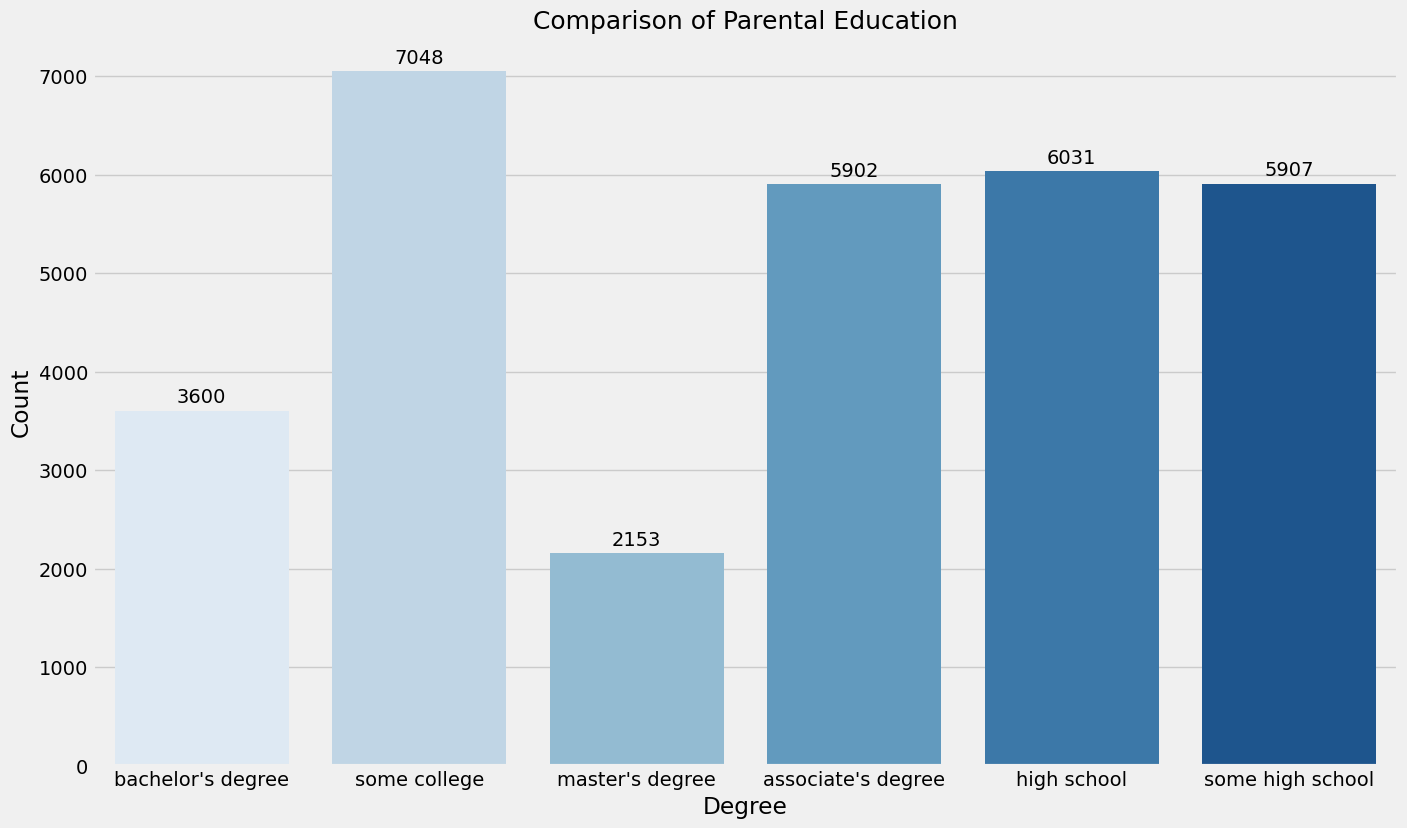

In [41]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
ax = sns.countplot(x='ParentEduc', data=df, palette='Blues')
plt.title('Comparison of Parental Education', fontsize=18)
ax.set(xlabel='Degree', ylabel='Count')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')
plt.show()

**Insights**
* Largest number of parents are from some college.

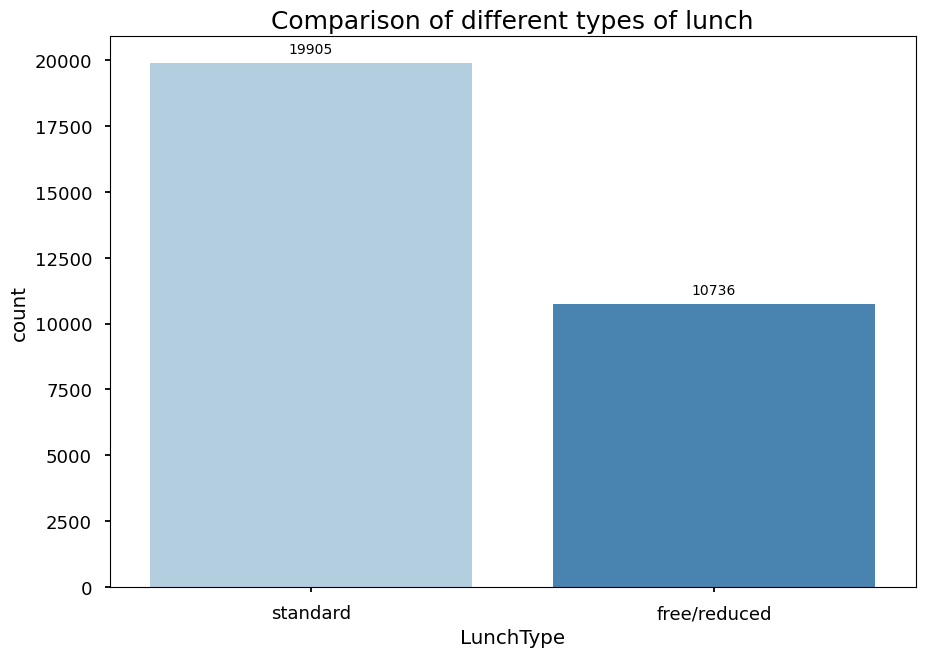

In [9]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('seaborn-v0_8-talk')
ax = sns.countplot(x='LunchType', data=df, palette='Blues')
plt.title('Comparison of different types of lunch', fontsize=18)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')
plt.show()

### Multivariate Analysis Using Pairplot

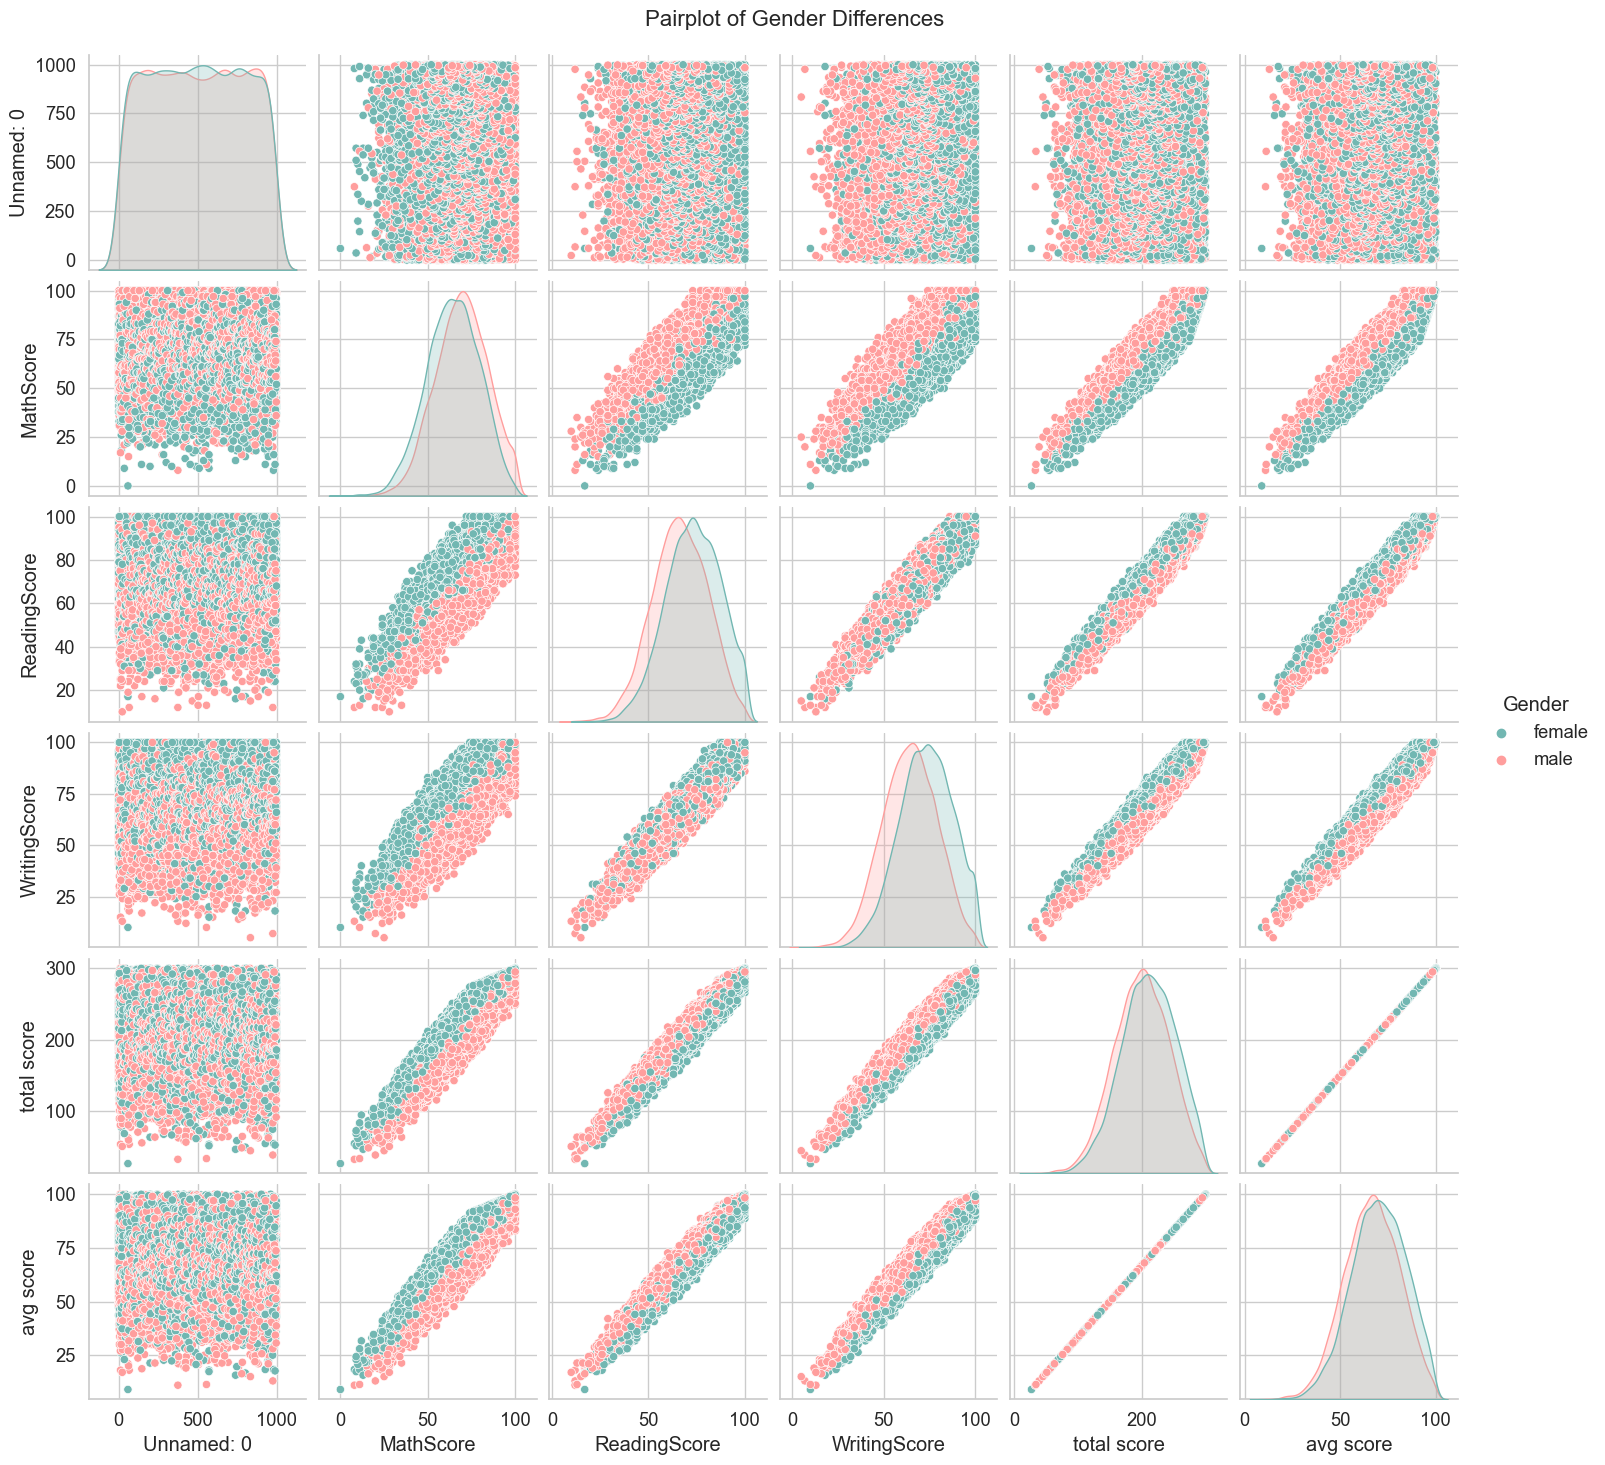

In [85]:
# Use a modern color palette
colors = ["#72b7b2", "#ff9e9d"]
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.2)
sns.pairplot(df, hue="Gender", palette=colors)
plt.subplots_adjust(top=0.95)
plt.suptitle("Pairplot of Gender Differences", fontsize=16)
plt.show()

**Insights**
* From the above plot it is clear that all the scores increase linearly with each other.

### Checking Outliers

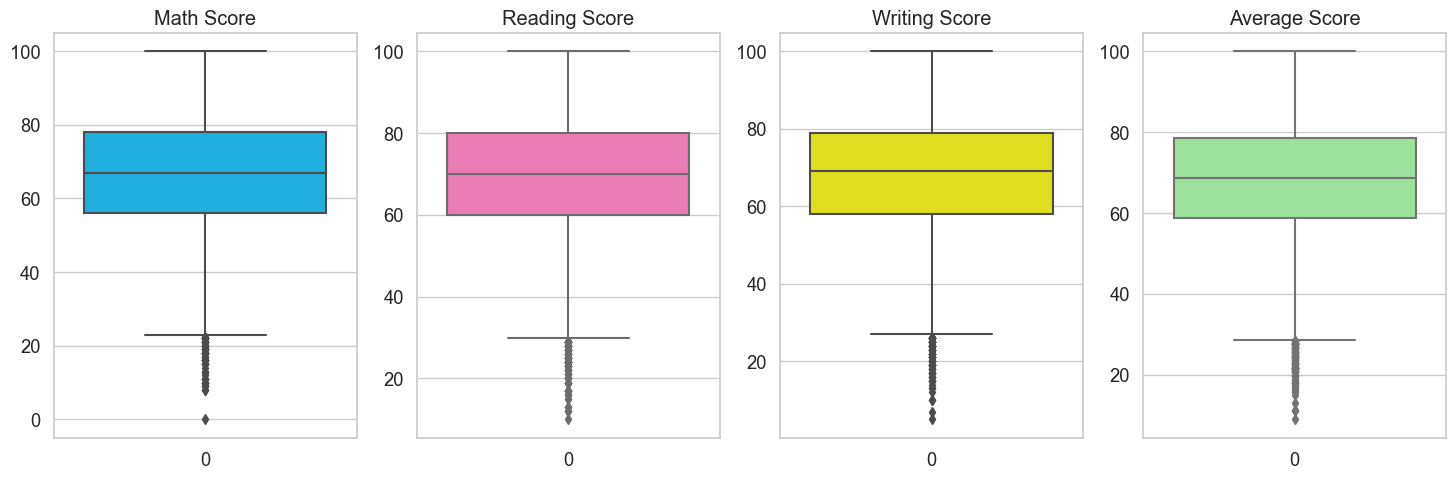

In [81]:
# Define modern color palettes
skyblue = "#00BFFF"
hotpink = "#FF69B4"
yellow = "#FFFF00"
lightgreen = "#90EE90"
fig, axs = plt.subplots(1, 4, figsize=(16, 5))
sns.boxplot(df['MathScore'], color=skyblue, ax=axs[0])
sns.boxplot(df['ReadingScore'], color=hotpink, ax=axs[1])
sns.boxplot(df['WritingScore'], color=yellow, ax=axs[2])
sns.boxplot(df['avg score'], color=lightgreen, ax=axs[3])
axs[0].set_title('Math Score')
axs[1].set_title('Reading Score')
axs[2].set_title('Writing Score')
axs[3].set_title('Average Score')
plt.show()